In [1052]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sb
from matplotlib.cbook import boxplot_stats
from scipy.stats import chi2

# Создание выборки

In [1053]:
n=70
mu, sigma = -3, 9 

s = np.random.normal(mu, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(a_estimate,sigma_estimate,"\n")
print(s)



-2.222999027059941 8.130367547722932 

[ -1.97112238  -6.52042093   4.83889051 -19.79411655  -1.2452888
  18.93811099  -8.75319859   3.66873183   1.47937851  -1.4214511
 -10.85250538  -0.33830928  -6.69924034  -4.5746004    2.2229565
  -2.94060655 -15.17211955  -5.10944766  -9.18656873   1.40786699
  -2.70930395  14.2730471    4.36405156  -3.1133995    5.42854733
  -2.11449358  -1.14800396  -5.48597825  -5.08709304  -5.07874058
  -0.31428525 -10.60466907  -2.02566245   8.47373655  -8.63996704
  -3.3661385    4.29837967  -7.20151696   4.07680345   7.04162607
  13.06596384  -9.97748905  -2.16953763 -14.80318587   3.22155069
   4.75455854  -9.8192509    2.15466523   8.83784207  -9.48893824
 -30.47040352   2.33686408   4.83218771 -11.48998644   3.50464964
  10.34636284   3.3455684   -8.36891591  -8.5298433   -1.55391638
  -5.21650693  -3.7187111   -5.43599588   0.34451405  -7.47805502
   5.31105438  -8.38790106  -0.04613753 -16.03633542   6.28151814]


# Нахождение количества интервалов

In [1054]:

q1 = np.percentile(s, 25)
q3 = np.percentile(s, 75)
IQR = q3 - q1

w_bins = int(round(2*IQR*n**(-1/3)))
len_s = int(np.max(s) - np.min(s))
k_bins = round(len_s/w_bins)
print (k_bins)

10


# Работа с абсолютными частотами

Абсолютные частоты:  [ 1.  0.  2.  4. 14. 20. 14. 11.  2.  2.] 

Сумма абсолютных частот:  70.0 



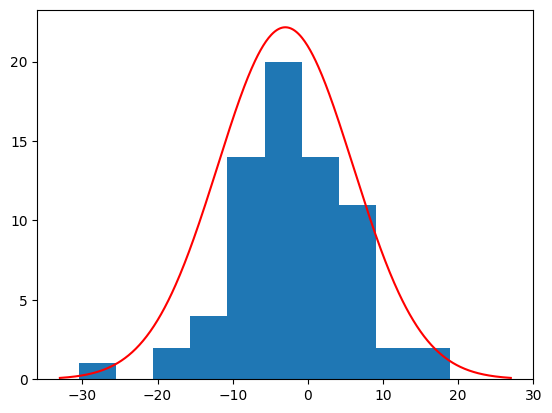

In [1055]:
count, bins, ignored  = plt.hist(s, k_bins)
print("Абсолютные частоты: ", count, "\n")
print("Сумма абсолютных частот: ", sum(count), "\n")

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf*500, color ="r")


# Работа с относительными частотами

[0.00289135 0.         0.00578269 0.01156539 0.04047885 0.05782693
 0.04047885 0.03180481 0.00578269 0.00578269]


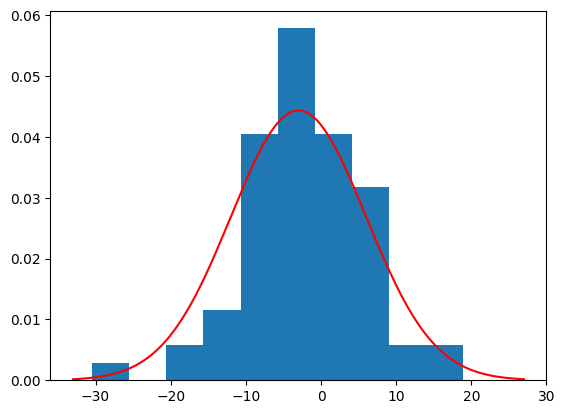

In [1056]:
count, bins, ignored  = plt.hist(s, k_bins, density=True)
print(count)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")


# Комулята

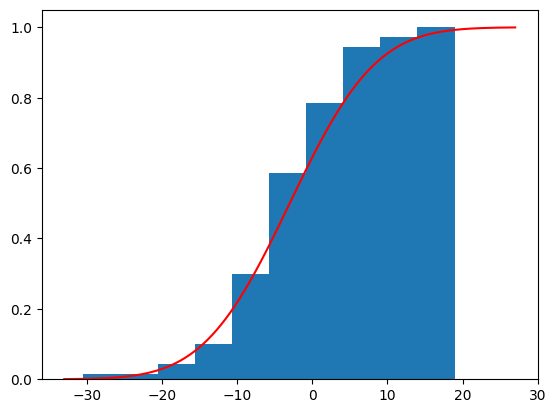

In [1057]:
count, bins, ignored  = plt.hist(s, k_bins, density=True, cumulative=True)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")

# Ящик с усами

<Axes: >

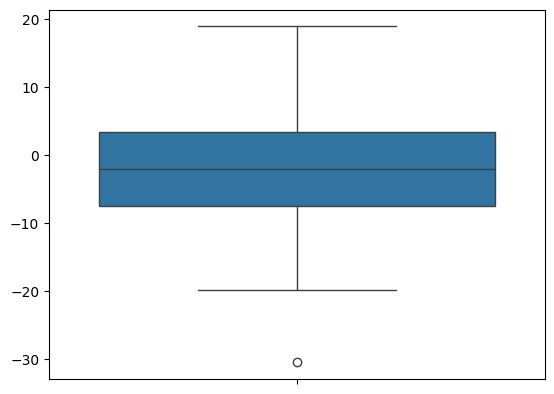

In [1058]:
sb.boxplot(s)

# Нахождение вероятностей

In [1059]:
q=1.5
lower_bound =  - q * sigma - mu
upper_bound =  q * sigma - mu
 
probability = sci.stats.norm.cdf(upper_bound, loc=mu, scale=sigma) - sci.stats.norm.cdf(lower_bound, loc=mu, scale=sigma) 
 
print(f"Вероятность P(|X - M(X)| < q * sigma): {probability:.4f}")

Вероятность P(|X - M(X)| < q * sigma): 0.7825


In [1060]:
con= np.abs(s - mu) < q * sigma 
frequency = np.sum(con) / n 
 
print(f'Относительная частота события |X - M(X)| < {q} * σ(Y): {frequency:.4f}')

Относительная частота события |X - M(X)| < 1.5 * σ(Y): 0.9286


In [1061]:
s_new = np.random.normal(mu, sigma, n*50)

con= np.abs(s_new - mu) < q * sigma 
frequency = np.sum(con) / (n*50) 
 
print(f'Относительная частота события |X - M(X)| < {q} * σ(Y): {frequency:.4f}')

Относительная частота события |X - M(X)| < 1.5 * σ(Y): 0.8646


# НАХОЖДЕНИЕ ТОЧЕЧНЫХ ОЦЕНОК

In [1062]:
print("Нахождение точечных оценок по формулам")
ma = sum(s)/n
print("Математическое ожидание: ", ma)
dis = sum((x - ma) ** 2 for x in s) / (n-1)
print("Выборочная дисперсия: ", dis)
sort = sorted(s)
mid = (sort[n // 2 - 1] + sort[n // 2]) / 2
print("Медиана: ", mid)
std = dis**0.5
print("Стандартное отклонение: ", std)
k_eks = np.sum(((s - ma) / std) ** 3) / n
print("Коэфициент ексцесса: ", k_eks)
eks = np.sum(((s - ma) / std) ** 4) / n - 3
print("Ексцесса: ", eks)

print("\n\nНахождение точечных оценок с помощью питона")
ma_f = s.mean()
print("Математическое ожидание: ", ma_f)
dis_f = s.var(ddof=1)
print("Выборочная дисперсия: ", dis_f)
mid_f = np.median(s)
print("Медиана: ", mid_f)
std_f = s.std()
print("Стандартное отклонение: ", std_f)
k_eks_f = sci.stats.skew(s)
print("Коэфициент ексцесса: ", k_eks_f)
eks_f = sci.stats.kurtosis(s)
print("Ексцесса: ", eks_f)

Нахождение точечных оценок по формулам
Математическое ожидание:  -2.222999027059941
Выборочная дисперсия:  66.10287646106622
Медиана:  -2.070078017394126
Стандартное отклонение:  8.130367547722933
Коэфициент ексцесса:  -0.3433765152568399
Ексцесса:  1.1912302757128908


Нахождение точечных оценок с помощью питона
Математическое ожидание:  -2.222999027059941
Выборочная дисперсия:  66.10287646106619
Медиана:  -2.070078017394126
Стандартное отклонение:  8.07208459163304
Коэфициент ексцесса:  -0.35086820317347195
Ексцесса:  1.3135955368605714


# 2 ЧАСТЬ

# МОДЕЛИРОВАНИЕ 

In [1063]:
from scipy.stats import expon


k = 7  # степени свободы 
n=70
q=1.5
mu = 3
sigma = 9
y = expon.rvs(mu, sigma, n)

print(Y)

[ 8.83379358 11.68749932  8.01347733  6.87326666 24.97229717  7.68780512
 11.50951311 14.12066894 14.09763075  8.88279533  7.55837623 12.71803752
  3.30430171 14.21915682 23.01693816 13.72561189 11.76163     7.6133123
 10.17476147 21.4901867   7.90072243 20.64838704  3.1459577  24.13966503
  7.59505628 26.177689   40.02389028  4.42023914  3.19111437  8.66468622
 22.1896704  21.69212974  7.66733161  7.47736132  3.78411106 33.61430199
 15.98747549  5.0435596   9.98848808  6.46013104 17.70233315 15.18026314
 26.93643303 16.23947713 18.00894514  6.26864475 16.2230337   3.29456114
  5.78415957  3.50179478  9.9004561   3.82580939 33.43245582  3.09009136
 38.52714089 10.08576383 18.91909609  5.89873645  7.42161484 16.74588133
 10.44590126  5.05382729 18.98932786  9.1410465   5.32145503  3.93468176
 12.04928877 15.74461557  9.32053494  4.5652546 ]


# НАХОЖДЕНИЕ КОЛИЧЕСВТА ПРОМЕЖУТКОВ

In [1064]:
q1 = np.percentile(y, 25)
q3 = np.percentile(y, 75)
IQR = q3 - q1

w_bins = int(round(2*IQR*n**(-1/3)))
len_s = int(np.max(y) - np.min(y))
k_bins = round(len_s/w_bins)
print (k_bins)

16


Абсолютные частоты:  [0.11533007 0.09130297 0.04324878 0.01922168 0.01441626 0.01441626
 0.00961084 0.00480542 0.         0.         0.         0.00961084
 0.         0.00480542 0.         0.00961084] 

Сумма абсолютных частот:  0.33637936362487975 



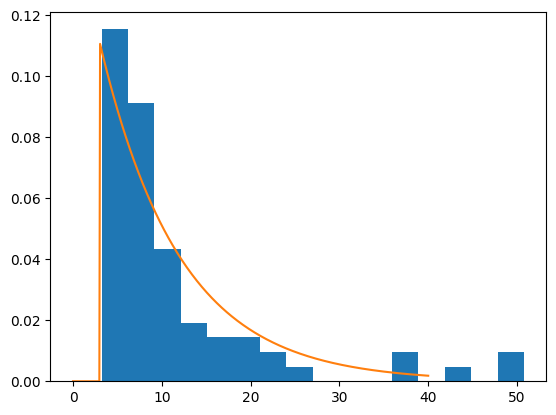

In [1065]:
count, bins, ignored  = plt.hist(y, k_bins, density= True)
print("Абсолютные частоты: ", count, "\n")
print("Сумма абсолютных частот: ", sum(count), "\n")

x = np.linspace(0,40, 500)
pdf = expon.pdf(x, mu, sigma)
plt.plot(x, pdf, label='Теоретическая кривая хи-квадрат')


<Axes: >

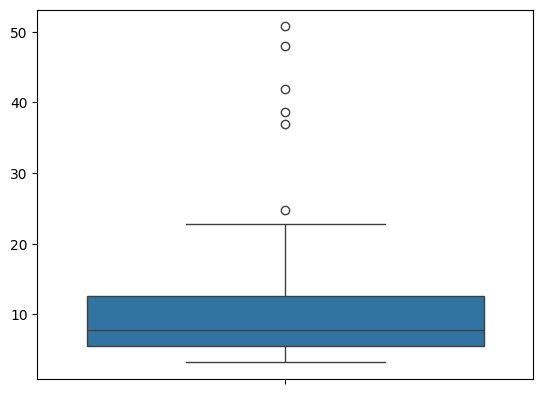

In [1066]:
sb.boxplot(y)

# ОПРЕДЕЛЕНИЕ ВЕРОЯТНОСТЕЙ

In [1067]:

lower_bound =  - q * sigma - mu
upper_bound =  q * sigma - mu
 
probability = sci.stats.norm.cdf(upper_bound, loc=mu, scale=sigma) - sci.stats.norm.cdf(lower_bound, loc=mu, scale=sigma) 
 
print(f"Вероятность P(|X - M(X)| < q * sigma): {probability:.4f}")

Вероятность P(|X - M(X)| < q * sigma): 0.7825


In [1068]:
con= np.abs(y - mu) < q * sigma 
frequency = np.sum(con) / n 
 
print(f'Относительная частота события |X - M(X)| < {q} * σ(Y): {frequency:.4f}')

Относительная частота события |X - M(X)| < 1.5 * σ(Y): 0.8000


In [1069]:
y_new = y = expon.rvs(k, size = n*50)

con= np.abs(y_new - mu) < q * sigma 
frequency = np.sum(con) / (n*50) 
 
print(f'Относительная частота события |X - M(X)| < {q} * σ(Y): {frequency:.4f}')

Относительная частота события |X - M(X)| < 1.5 * σ(Y): 1.0000


# НАХОЖДЕНИЕ ТОЧЕЧНЫХ ОЦЕНОК

In [1074]:
print("Нахождение точечных оценок по формулам")
ma = sum(y)/len(y)
print("Математическое ожидание: ", ma)
dis = sum((x - ma) ** 2 for x in y) / (len(y)-1)
print("Выборочная дисперсия: ", dis)
sort = sorted(y)
mid = (sort[n // 2 - 1] + sort[n // 2]) / 2
print("Медиана: ", mid)
std = dis**0.5
print("Стандартное отклонение: ", std)
k_eks = np.sum(((y - ma) / std) ** 3) / len(y)
print("Коэфициент ексцесса: ", k_eks)
eks = np.sum(((y - ma) / std) ** 4) / len(y) - 3
print("Ексцесса: ", eks)

print("\n\nНахождение точечных оценок с помощью питона")
ma_f = y.mean()
print("Математическое ожидание: ", ma_f)
dis_f = y.var(ddof=1)
print("Выборочная дисперсия: ", dis_f)
mid_f = np.median(y)
print("Медиана: ", mid_f)
std_f = y.std()
print("Стандартное отклонение: ", std_f)
k_eks_f = sci.stats.skew(y)
print("Коэфициент ексцесса: ", k_eks_f)
eks_f = sci.stats.kurtosis(y)
print("Ексцесса: ", eks_f)

Нахождение точечных оценок по формулам
Математическое ожидание:  7.996819165405973
Выборочная дисперсия:  1.003622966356726
Медиана:  7.009540805050918
Стандартное отклонение:  1.0018098454081623
Коэфициент ексцесса:  1.9788511852450836
Ексцесса:  5.429554089665656


Нахождение точечных оценок с помощью питона
Математическое ожидание:  7.996819165406008
Выборочная дисперсия:  1.0036229663567253
Медиана:  7.674868924910873
Стандартное отклонение:  1.0016667194919506
Коэфициент ексцесса:  1.97969956731075
Ексцесса:  5.434373042883932


In [1071]:


print("\n\nНахождение точечных оценок с помощью питона с увеличенной выборкой")
ma_f = y_new.mean()
print("Математическое ожидание: ", ma_f)
dis_f = y_new.var(ddof=1)
print("Выборочная дисперсия: ", dis_f)
mid_f = np.median(y_new)
print("Медиана: ", mid_f)
std_f = y_new.std()
print("Стандартное отклонение: ", std_f)
k_eks_f = sci.stats.skew(y_new)
print("Коэфициент ексцесса: ", k_eks_f)
eks_f = sci.stats.kurtosis(y_new)
print("Ексцесса: ", eks_f)



Нахождение точечных оценок с помощью питона с увеличенной выборкой
Математическое ожидание:  7.996819165406008
Выборочная дисперсия:  1.0036229663567253
Медиана:  7.674868924910873
Стандартное отклонение:  1.0016667194919506
Коэфициент ексцесса:  1.97969956731075
Ексцесса:  5.434373042883932
